Dataset

In [17]:
# Dataset: bbc-news-data.txt
# Location: https://mitu.co.in/dataset

#### Import necessary libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
file = open('bbc-text-data.csv')

In [20]:
data = file.readlines()

In [21]:
len(data)

2225

#### Feature Extraction

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tfidf = TfidfVectorizer(stop_words='english')

In [24]:
x_vect = tfidf.fit_transform(data)

In [25]:
x_vect.shape

(2225, 29126)

Elbow method

In [26]:
from sklearn.cluster import AgglomerativeClustering

#### Build the model

In [27]:
agl = AgglomerativeClustering(n_clusters=5)

In [30]:
labels = agl.fit_predict(x_vect.toarray())

In [31]:
labels

array([4, 0, 0, ..., 0, 0, 0])

In [32]:
agl.labels_

array([4, 0, 0, ..., 0, 0, 0])

In [33]:
len(labels)

2225

In [44]:
pd.Series(labels).value_counts().to_dict()

{0: 1121, 4: 368, 2: 365, 1: 225, 3: 146}

In [34]:
df = pd.DataFrame(data, columns=['text'])
df

,text
0,tv future in the hands of viewers with home th...
1,worldcom boss left books alone former worldc...
2,tigers wary of farrell gamble leicester say ...
3,yeading face newcastle in fa cup premiership s...
4,ocean s twelve raids box office ocean s twelve...
...,...
2220,cars pull down us retail figures us retail sal...
2221,kilroy unveils immigration policy ex-chatshow ...
2222,rem announce new glasgow concert us band rem h...
2223,how political squabbles snowball it s become c...


In [35]:
df[labels == 2]

,text
3,yeading face newcastle in fa cup premiership s...
7,henman hopes ended in dubai third seed tim hen...
8,wilkinson fit to face edinburgh england captai...
14,moya emotional after davis cup win carlos moya...
17,connors boost for british tennis former world ...
...,...
2164,murray to make cup history andrew murray will ...
2177,henman decides to quit davis cup tim henman ha...
2180,campbell lifts lid on united feud arsenal s so...
2195,owen delighted with real display michael owen ...


In [36]:
print('0:', len(df[labels == 0]))
print('1:', len(df[labels == 1]))
print('2:', len(df[labels == 2]))
print('3:', len(df[labels == 3]))
print('4:', len(df[labels == 4]))


0: 1121
1: 225
2: 365
3: 146
4: 368


In [37]:
from nltk.corpus import stopwords
from nltk import FreqDist
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk import pos_tag

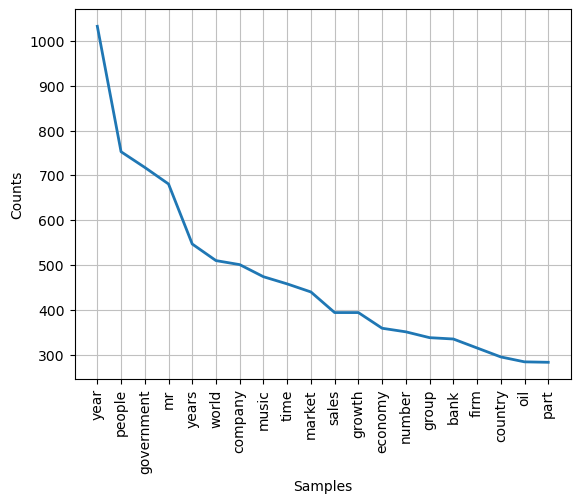

[('year', 1033),
 ('people', 753),
 ('government', 718),
 ('mr', 681),
 ('years', 547),
 ('world', 510),
 ('company', 501),
 ('music', 474),
 ('time', 458),
 ('market', 440),
 ('sales', 394),
 ('growth', 394),
 ('economy', 359),
 ('number', 351),
 ('group', 338),
 ('bank', 335),
 ('firm', 315),
 ('country', 295),
 ('oil', 284),
 ('part', 283)]

In [38]:
df_0 = df[labels == 0]

words = []
for row in df_0['text']:
    for word in word_tokenize(row):
        if word.isalpha():
            words.append(word)

# words = " ".join(words)
swords = stopwords.words('english')
txt_without_stpwords = []
for word in words :
    if word.lower() not in swords:
        txt_without_stpwords.append(word)
txt_without_stpwords = " ".join(txt_without_stpwords)
tags = pos_tag(word_tokenize(txt_without_stpwords))

txt = []
for w in tags:
  if w[1].startswith('N') :
    txt.append(w[0])
    
txt = " ".join(txt)
txt
freq = FreqDist(word_tokenize(txt.lower()))
freq.plot(20, cumulative=False)
freq.most_common(20)

Cluster 0 is of Finance News

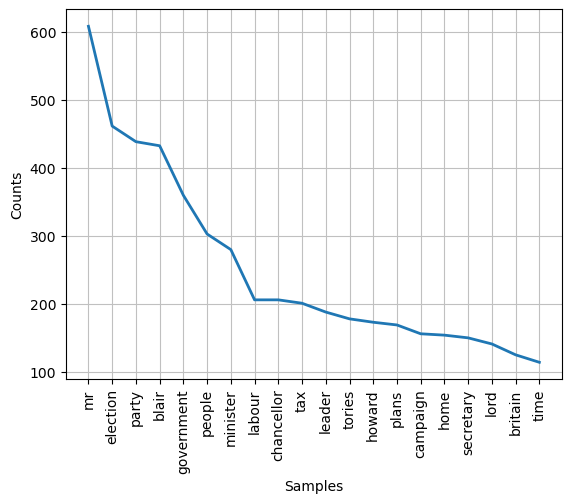

[('mr', 609),
 ('election', 462),
 ('party', 439),
 ('blair', 433),
 ('government', 360),
 ('people', 303),
 ('minister', 280),
 ('labour', 206),
 ('chancellor', 206),
 ('tax', 201),
 ('leader', 188),
 ('tories', 178),
 ('howard', 173),
 ('plans', 169),
 ('campaign', 156),
 ('home', 154),
 ('secretary', 150),
 ('lord', 141),
 ('britain', 125),
 ('time', 114)]

In [39]:
df_1 = df[labels == 1]

words = []
for row in df_1['text']:
    for word in word_tokenize(row):
        if word.isalpha():
            words.append(word)

# words = " ".join(words)
swords = stopwords.words('english')
txt_without_stpwords = []
for word in words :
    if word.lower() not in swords:
        txt_without_stpwords.append(word)
txt_without_stpwords = " ".join(txt_without_stpwords)
tags = pos_tag(word_tokenize(txt_without_stpwords))

txt = []
for w in tags:
  if w[1].startswith('N') :
    txt.append(w[0])
    
txt = " ".join(txt)
txt
freq = FreqDist(word_tokenize(txt.lower()))
freq.plot(20, cumulative=False)
freq.most_common(20)

Cluster 1 is of Politics News

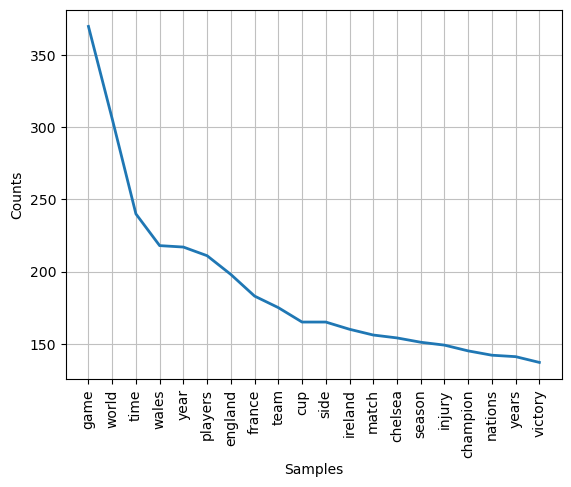

[('game', 370),
 ('world', 306),
 ('time', 240),
 ('wales', 218),
 ('year', 217),
 ('players', 211),
 ('england', 198),
 ('france', 183),
 ('team', 175),
 ('cup', 165),
 ('side', 165),
 ('ireland', 160),
 ('match', 156),
 ('chelsea', 154),
 ('season', 151),
 ('injury', 149),
 ('champion', 145),
 ('nations', 142),
 ('years', 141),
 ('victory', 137)]

In [40]:
df_2 = df[labels == 2]

words = []
for row in df_2['text']:
    for word in word_tokenize(row):
        if word.isalpha():
            words.append(word)

# words = " ".join(words)
swords = stopwords.words('english')
txt_without_stpwords = []
for word in words :
    if word.lower() not in swords:
        txt_without_stpwords.append(word)
txt_without_stpwords = " ".join(txt_without_stpwords)
tags = pos_tag(word_tokenize(txt_without_stpwords))

txt = []
for w in tags:
  if w[1].startswith('N') :
    txt.append(w[0])
    
txt = " ".join(txt)
txt
freq = FreqDist(word_tokenize(txt.lower()))
freq.plot(20, cumulative=False)
freq.most_common(20)

Cluster 2 is of Sports News

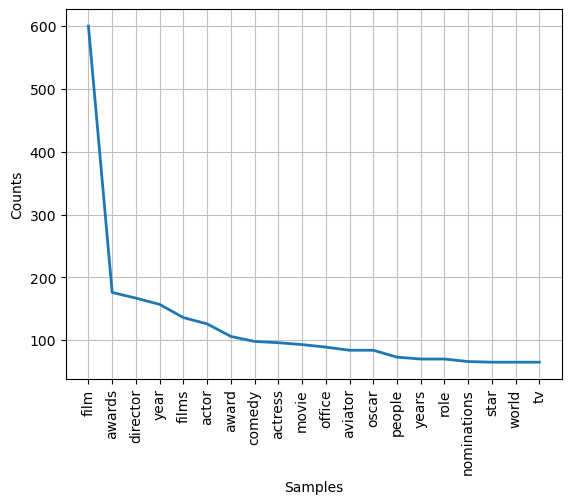

[('film', 600),
 ('awards', 176),
 ('director', 167),
 ('year', 157),
 ('films', 136),
 ('actor', 126),
 ('award', 106),
 ('comedy', 98),
 ('actress', 96),
 ('movie', 93),
 ('office', 89),
 ('aviator', 84),
 ('oscar', 84),
 ('people', 73),
 ('years', 70),
 ('role', 70),
 ('nominations', 66),
 ('star', 65),
 ('world', 65),
 ('tv', 65)]

In [41]:
df_3 = df[labels == 3]

words = []
for row in df_3['text']:
    for word in word_tokenize(row):
        if word.isalpha():
            words.append(word)

# words = " ".join(words)
swords = stopwords.words('english')
txt_without_stpwords = []
for word in words :
    if word.lower() not in swords:
        txt_without_stpwords.append(word)
txt_without_stpwords = " ".join(txt_without_stpwords)
tags = pos_tag(word_tokenize(txt_without_stpwords))

txt = []
for w in tags:
  if w[1].startswith('N') :
    txt.append(w[0])
    
txt = " ".join(txt)
txt
freq = FreqDist(word_tokenize(txt.lower()))
freq.plot(20, cumulative=False)
freq.most_common(20)

Cluster 3 is of Entertainment News

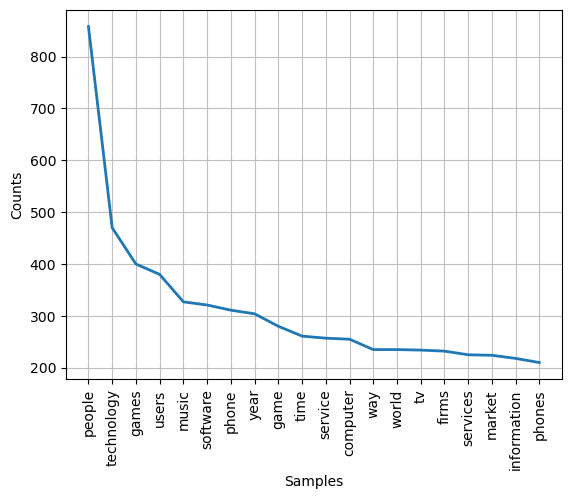

[('people', 858),
 ('technology', 470),
 ('games', 400),
 ('users', 380),
 ('music', 327),
 ('software', 321),
 ('phone', 311),
 ('year', 304),
 ('game', 280),
 ('time', 261),
 ('service', 257),
 ('computer', 255),
 ('way', 235),
 ('world', 235),
 ('tv', 234),
 ('firms', 232),
 ('services', 225),
 ('market', 224),
 ('information', 218),
 ('phones', 210)]

In [42]:
df_4 = df[labels == 4]

words = []
for row in df_4['text']:
    for word in word_tokenize(row):
        if word.isalpha():
            words.append(word)

# words = " ".join(words)
swords = stopwords.words('english')
txt_without_stpwords = []

for word in words :
    if word.lower() not in swords:
        txt_without_stpwords.append(word)
txt_without_stpwords = " ".join(txt_without_stpwords)
tags = pos_tag(word_tokenize(txt_without_stpwords))

txt = []
for w in tags:
  if w[1].startswith('N') :
    txt.append(w[0])
    
txt = " ".join(txt)
txt
freq = FreqDist(word_tokenize(txt.lower()))
freq.plot(20, cumulative=False)
freq.most_common(20)

Cluster 4 is of Technology News

In [43]:
two = df[labels == 2]['text']

two_data = list(two.values)

words = []

for sent in two_data:
    words.extend(sent.split())
    
words = [word for word in words
         if word not in stopwords.words('english')
         and word.isalpha()]

freq = FreqDist(words)
freq.most_common(10)

[('said', 373),
 ('first', 356),
 ('england', 344),
 ('win', 308),
 ('last', 306),
 ('game', 302),
 ('world', 292),
 ('two', 275),
 ('one', 264),
 ('would', 251)]